# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [15]:
import pandas as pd

# Carregar as bases
X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt', header=None)
X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)
y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt', header=None)

print("X_train:")
print(X_train.head())

print("\ny_train:")
print(y_train.head())

print("\nX_test:")
print(X_test.head())

print("\ny_test:")
print(y_test.head())


X_train:
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0.123320   

        555       556       557       558       559       5

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [16]:
from sklearn.model_selection import train_test_split

# Dividir a base de treino em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Verificar o tamanho dos conjuntos resultantes
print(f'Tamanho do conjunto de treino: {len(X_train)}')
print(f'Tamanho do conjunto de validação: {len(X_val)}')


Tamanho do conjunto de treino: 5514
Tamanho do conjunto de validação: 1838


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Criar o modelo de árvore de decisão
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Obter a importância das variáveis
importances = clf.feature_importances_

# Criar um DataFrame para visualização
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Exibir as três variáveis mais importantes
top_3_features = importances_df.head(3)
print("Três variáveis mais importantes:")
print(top_3_features)


Três variáveis mais importantes:
     Feature  Importance
52        52    0.285303
389      389    0.254091
41        41    0.164608


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

Melhor ccp_alpha encontrado: 0.0
Acurácia correspondente no conjunto de validação: 0.8846572361262242


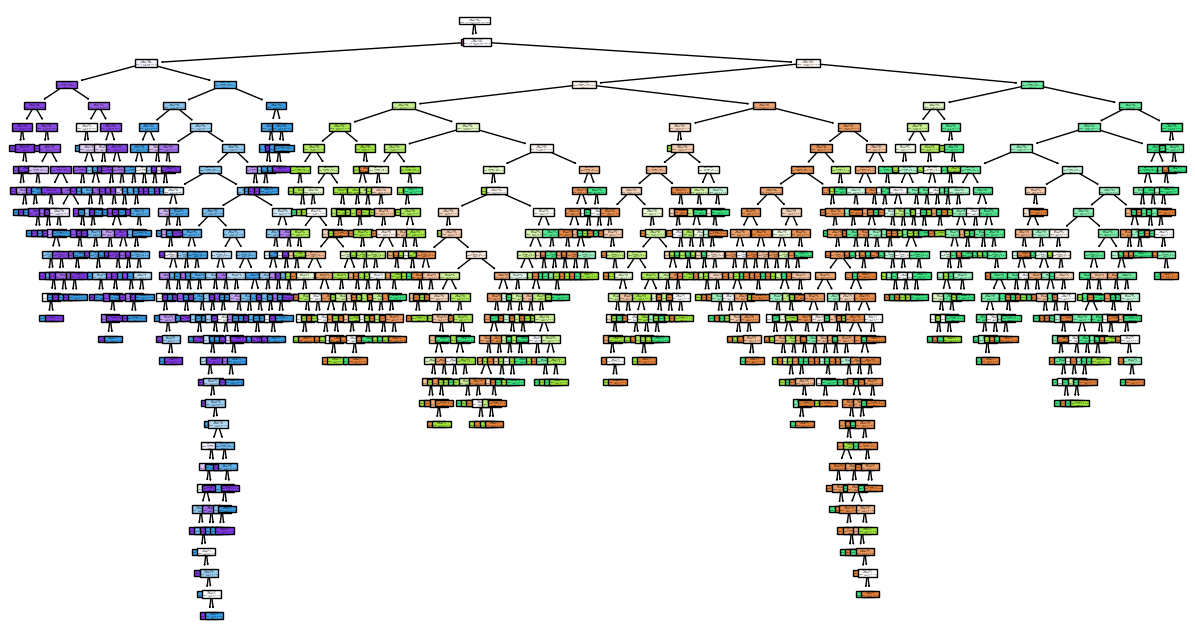

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Selecionar as três melhores variáveis
selected_features = [52, 389, 41]

# Criar conjuntos de treino e validação apenas com as três melhores variáveis
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]

# Inicializar a árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Encontrar o melhor ccp_alpha usando a base de validação
ccp_alphas = np.linspace(0, 0.03, 50)  # Ajuste esse intervalo conforme necessário
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_selected, y_train)
    clfs.append(clf)

# Calcular as acurácias no conjunto de validação para cada ccp_alpha
val_accuracies = [accuracy_score(y_val, clf.predict(X_val_selected)) for clf in clfs]

# Encontrar o melhor ccp_alpha
best_alpha = ccp_alphas[np.argmax(val_accuracies)]
best_clf = clfs[np.argmax(val_accuracies)]

# Imprimir o melhor ccp_alpha e acurácia correspondente
print(f"Melhor ccp_alpha encontrado: {best_alpha}")
print(f"Acurácia correspondente no conjunto de validação: {max(val_accuracies)}")

# Plotar a árvore de decisão com nomes de variáveis
plt.figure(figsize=(15, 8))
plot_tree(best_clf, filled=True, feature_names=list(X_train_selected.columns.astype(str)), class_names=['1', '2', '3', '4', '5', '6'])
plt.show()



In [25]:
from sklearn.tree import export_text

# Definir a profundidade máxima para exibição das regras
max_depth_for_rules = 3

# Exportar a árvore de decisão para o formato de texto com a profundidade limitada
tree_rules = export_text(best_clf, feature_names=list(X_train_selected.columns.astype(str)), max_depth=max_depth_for_rules)

# Exibir as regras da árvore no console
print("Regras da Árvore de Decisão:")
print(tree_rules)


Regras da Árvore de Decisão:
|--- 52 <= 0.10
|   |--- class: 6
|--- 52 >  0.10
|   |--- 389 <= -0.98
|   |   |--- 41 <= -0.08
|   |   |   |--- 41 <= -0.17
|   |   |   |   |--- truncated branch of depth 11
|   |   |   |--- 41 >  -0.17
|   |   |   |   |--- truncated branch of depth 12
|   |   |--- 41 >  -0.08
|   |   |   |--- 41 <= 0.08
|   |   |   |   |--- truncated branch of depth 25
|   |   |   |--- 41 >  0.08
|   |   |   |   |--- truncated branch of depth 5
|   |--- 389 >  -0.98
|   |   |--- 389 <= -0.64
|   |   |   |--- 52 <= 0.94
|   |   |   |   |--- truncated branch of depth 16
|   |   |   |--- 52 >  0.94
|   |   |   |   |--- truncated branch of depth 24
|   |   |--- 389 >  -0.64
|   |   |   |--- 41 <= -0.29
|   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- 41 >  -0.29
|   |   |   |   |--- truncated branch of depth 15



### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [33]:
# Converter os rótulos das colunas para inteiros
selected_features = [int(feature) for feature in ['52', '389', '41']]
X_test_selected = X_test.iloc[:, selected_features]

# Fazer previsões na base de teste
y_pred_test = best_clf.predict(X_test_selected)

# Calcular a acurácia na base de teste
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Acurácia no conjunto de teste: {accuracy_test:.4f}')


Acurácia no conjunto de teste: 0.6766
